<a href="https://colab.research.google.com/github/rishisubedi/Data_Analyst_Nanodegree/blob/master/COVID_19_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**From epidemic to pandemic**
In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy.

We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines?

Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a publicly available data repository to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.

In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.

Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on March 17, 2020, and should not be considered to be the most up to date data available.

In [ ]:
library(dplyr)
library(readr)
library(tidyverse)
library(ggplot2)
library(lubridate)

In [ ]:
confirmed_cases_worldwide <- read_csv("confirmed_cases_worldwide.csv")
covid<- read_csv('time_series_covid_19_confirmed.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
ℹ Use `spec()` for the full column specifications.




**Research Questions**

In this report, there are 5 questions that will be answered using the data analysis tool available in R.


In [ ]:
str(confirmed_cases_worldwide)

'data.frame':	56 obs. of  2 variables:
 $ date     : chr  "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" ...
 $ cum_cases: int  555 653 941 1434 2118 2927 5578 6166 8234 9927 ...


In [ ]:
str(covid)

'data.frame':	501 obs. of  66 variables:
 $ Province.State: chr  "" "" "" "" ...
 $ Country.Region: chr  "Thailand" "Japan" "Singapore" "Nepal" ...
 $ Lat           : num  15 36 1.28 28.17 2.5 ...
 $ Long          : num  101 138 103.8 84.2 112.5 ...
 $ X1.22.20      : int  2 2 0 0 0 0 0 0 0 0 ...
 $ X1.23.20      : int  3 1 1 0 0 0 0 0 0 0 ...
 $ X1.24.20      : int  5 2 3 0 0 0 0 0 0 0 ...
 $ X1.25.20      : int  7 2 3 1 3 0 0 0 0 0 ...
 $ X1.26.20      : int  8 4 4 1 4 0 3 1 0 0 ...
 $ X1.27.20      : int  8 4 5 1 4 0 4 1 0 1 ...
 $ X1.28.20      : int  14 7 7 1 4 1 4 1 0 1 ...
 $ X1.29.20      : int  14 7 7 1 7 1 4 1 1 1 ...
 $ X1.30.20      : int  14 11 10 1 8 1 4 2 3 1 ...
 $ X1.31.20      : int  19 15 13 1 8 1 4 3 2 1 ...
 $ X2.1.20       : int  19 20 16 1 8 1 4 4 3 1 ...
 $ X2.2.20       : int  19 20 18 1 8 1 4 4 2 1 ...
 $ X2.3.20       : int  19 20 18 1 8 1 4 4 2 1 ...
 $ X2.4.20       : int  25 22 24 1 10 1 4 4 3 1 ...
 $ X2.5.20       : int  25 22 28 1 12 2 4 4 3 1 ...
 $ X2

## Q.N.1 What is the latest number of COVID-19 cases of the top 10 and bottom 10 countries, respectively. 

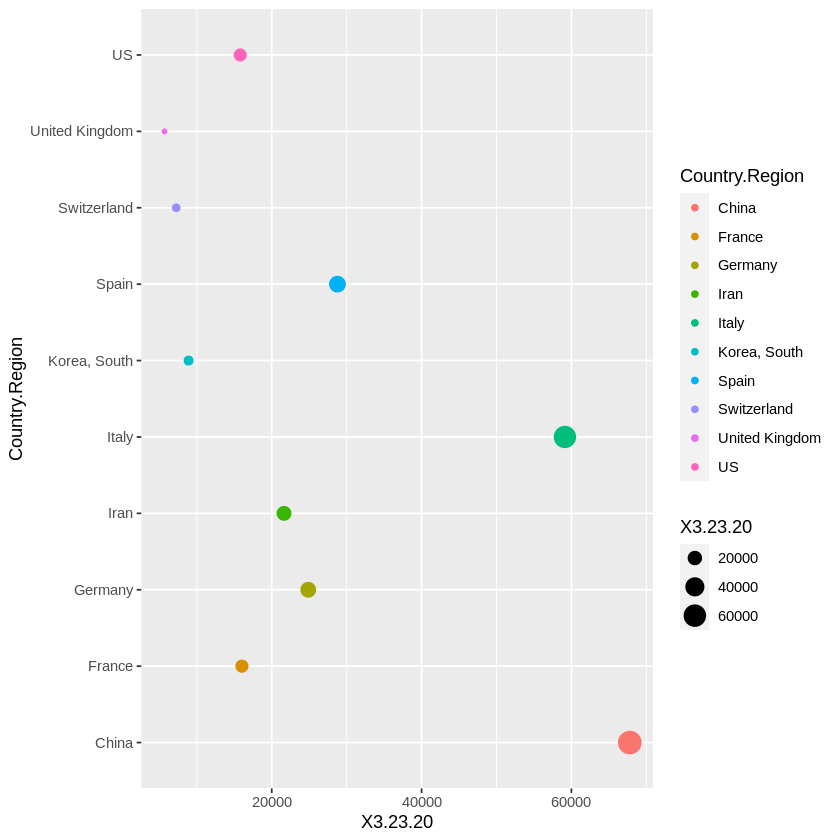

In [ ]:
covid %>% select(Country.Region,X3.23.20) %>% arrange(desc(X3.23.20)) %>% head(10) %>% ggplot(aes(x=X3.23.20,y=Country.Region,color=Country.Region,size=X3.23.20))+geom_point()

Observation



1.   China has the highest number of Covid-19 cases according to the data recorded (March 23, 2020)
2.   Italy has the second hight number of covid-19 cases after china.



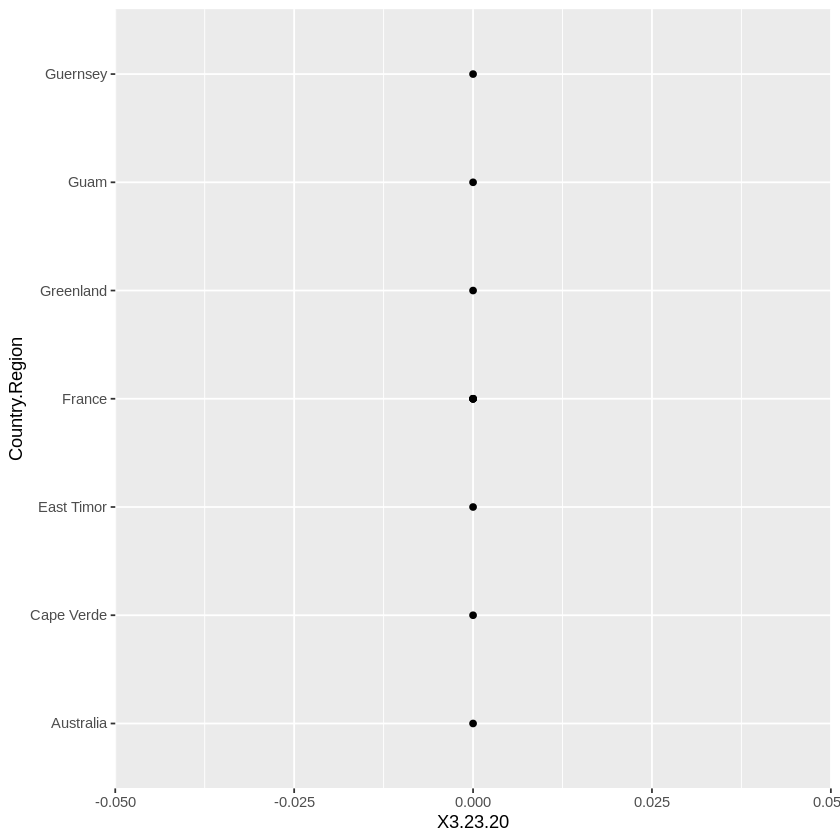

In [ ]:
covid %>% select(Country.Region,X3.23.20) %>% arrange(X3.23.20) %>% head(10)%>% ggplot(aes(x=X3.23.20,y=Country.Region))+geom_point()

## Q.N.2. Visualize the confirmed cases worldwide from January to March. 

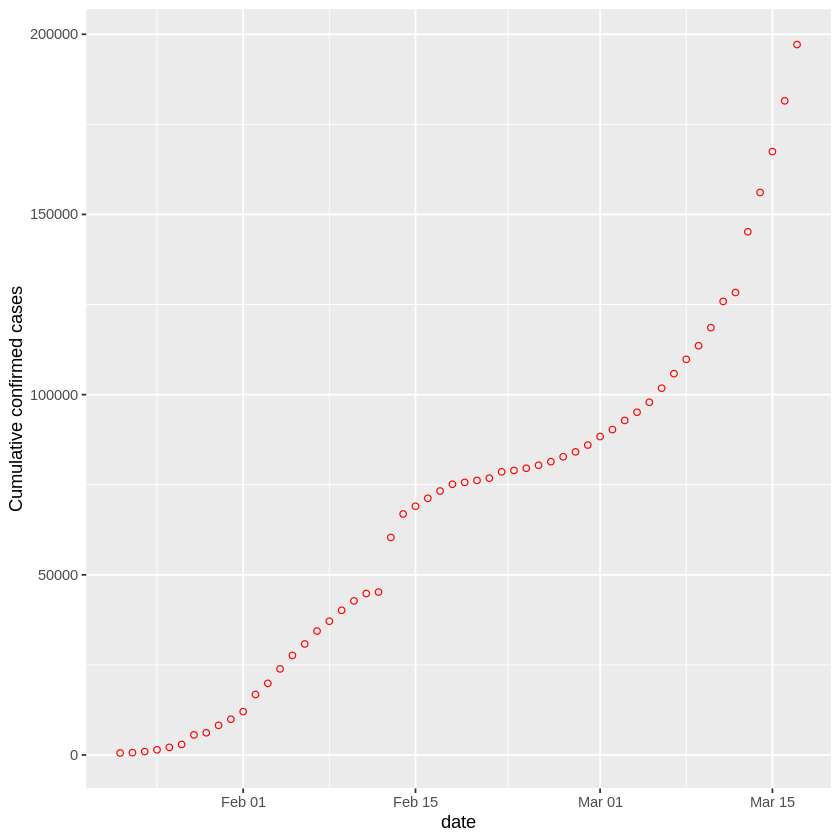

In [ ]:
# line plot of cumulative cases vs. date worldwide
ggplot(data=confirmed_cases_worldwide,aes(x=date,y=cum_cases)) +
  geom_point(shape=21,color='red') +
  ylab("Cumulative confirmed cases")

## Q.N.3. Is there any difference between the confirmed cases of COVID-19 in China and the rest of the world from January to March. 


── Column specification ────────────────────────────────────────────────────────
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "China…
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,…
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089, 47…
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 118…


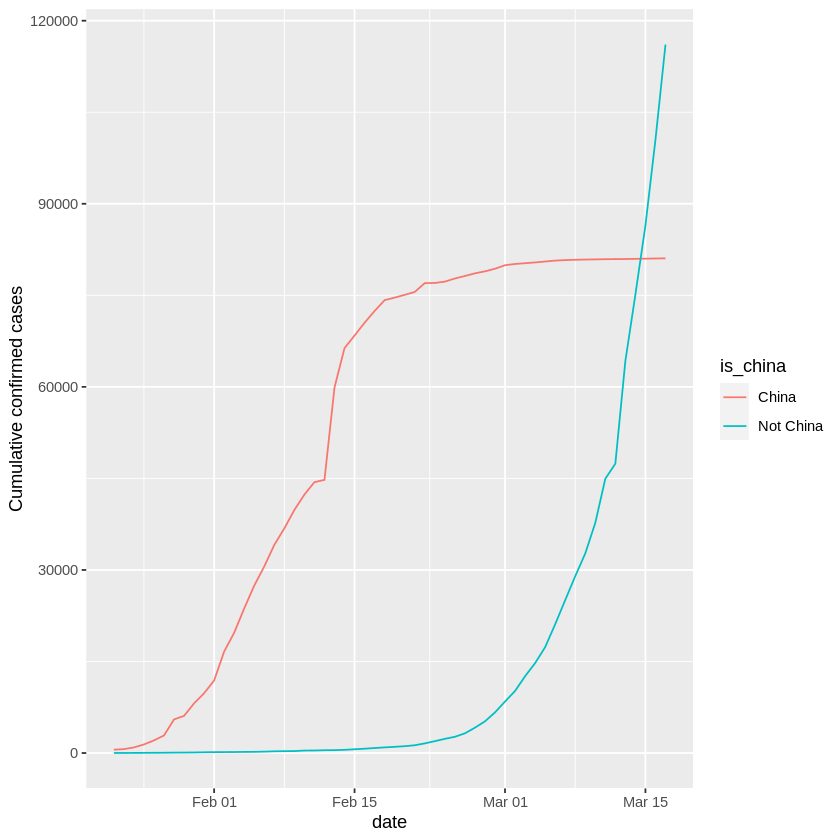

In [ ]:
# Reading the filter file where the confirmed cases is from China or Not from the China
confirmed_cases_china_vs_world <- read_csv("confirmed_cases_china_vs_world.csv")

# See the result
glimpse(confirmed_cases_china_vs_world)

#  line plot of cumulative cases vs. date, colored by is_china
#  aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date, cum_cases, color = is_china)) +
  ylab("Cumulative confirmed cases")

# See the plot
plt_cum_confirmed_cases_china_vs_world

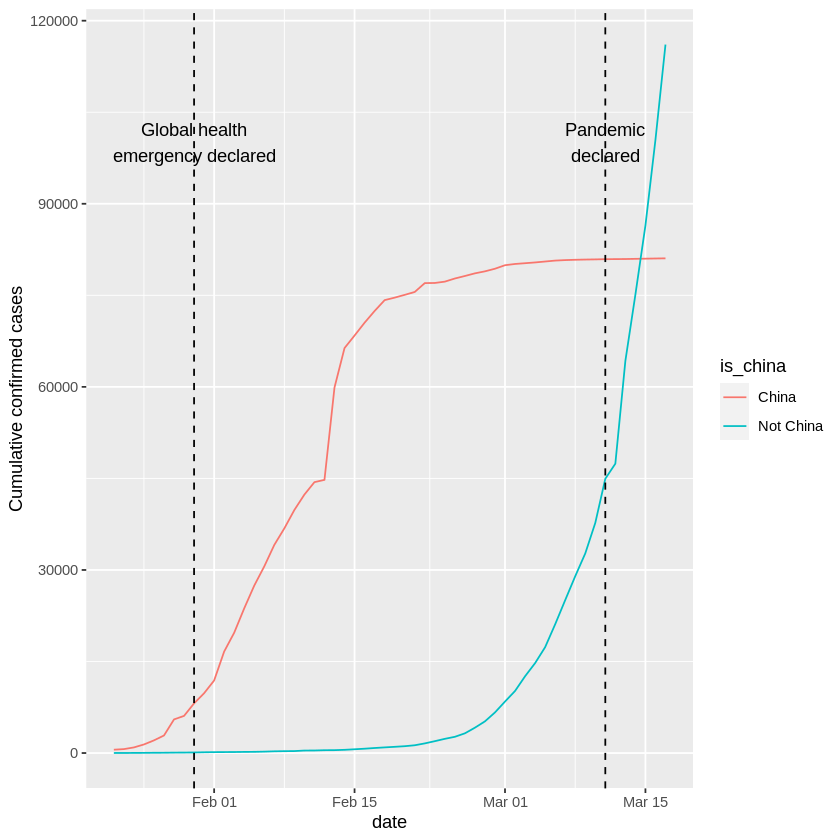

In [ ]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared"
) %>%
  mutate(date = as.Date(date))

# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed") +
  geom_text(aes(date, label = event), data = who_events, y = 1e5)

### Q.N. 4 How fast the number of cases is growing in China after 15 February 2020. How does the rest of the world compare to linear growth? 

`geom_smooth()` using formula 'y ~ x'



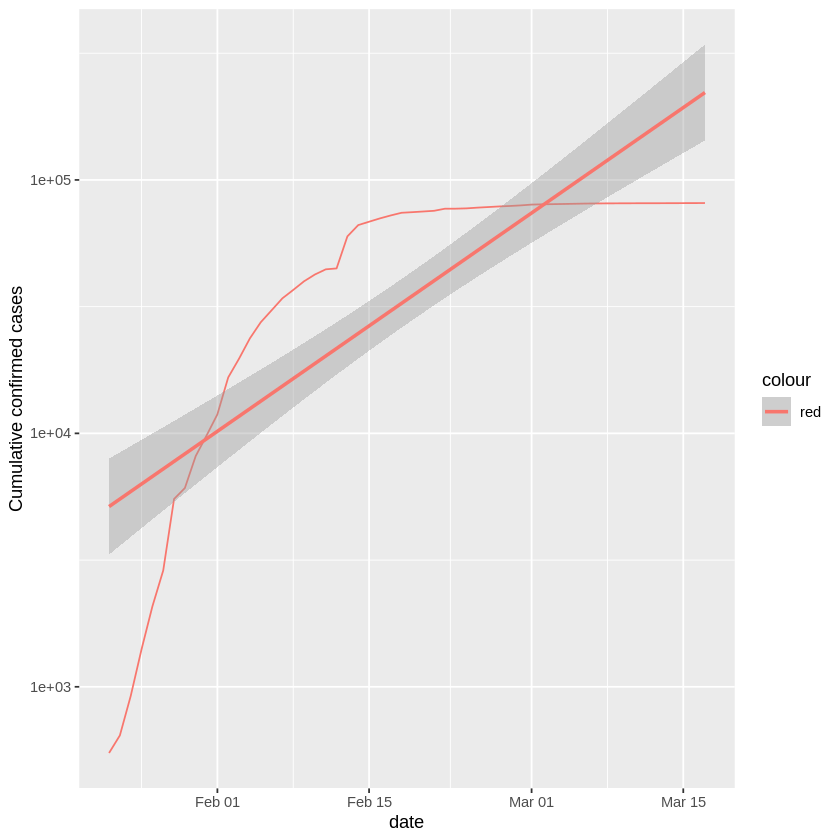

In [ ]:
confirmed_cases_china_vs_world %>% filter(is_china=="China",date>=2020-02-15) %>% ggplot(aes(date,cum_cases,color='red'))+geom_line()+geom_smooth(method="lm")+ylab("Cumulative confirmed cases")+
                                   scale_y_log10()

`geom_smooth()` using formula 'y ~ x'



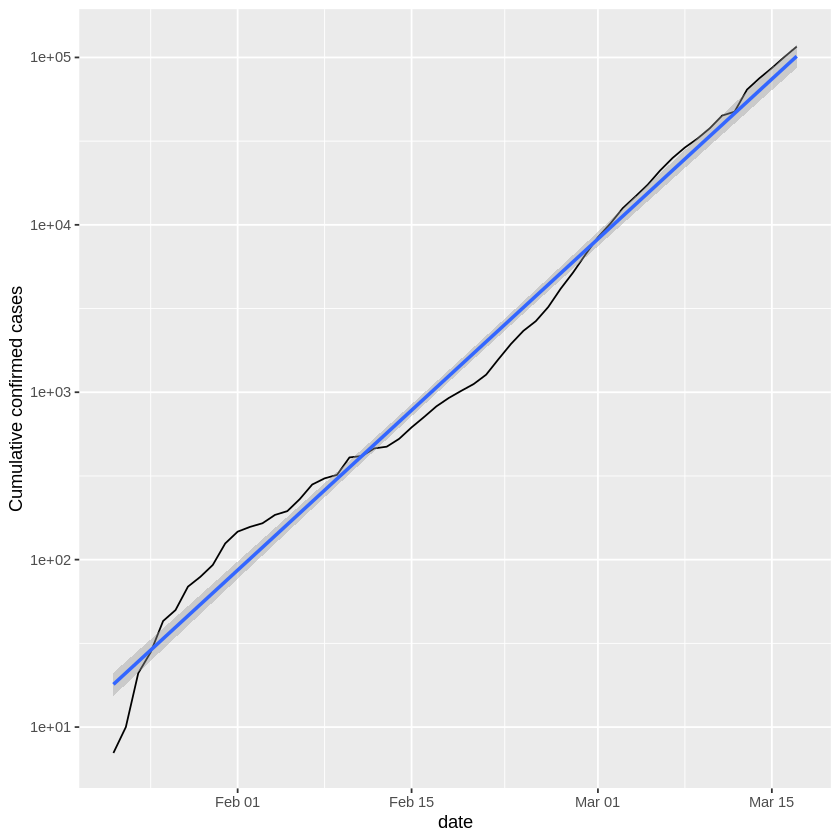

In [ ]:
confirmed_cases_china_vs_world %>% filter(is_china=="Not China",date>=2020-02-15) %>% ggplot(aes(date,cum_cases))+geom_line()+geom_smooth(method="lm")+ylab("Cumulative confirmed cases")+
                                   scale_y_log10()

Observation<br>
The china seem slowly decreasing after the February 15 while the rest of the world has the exponently growthly in the COVID-19 cases.

## 5. Which countries outside of China have been hit hardest?


In [ ]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua and…
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22,…
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


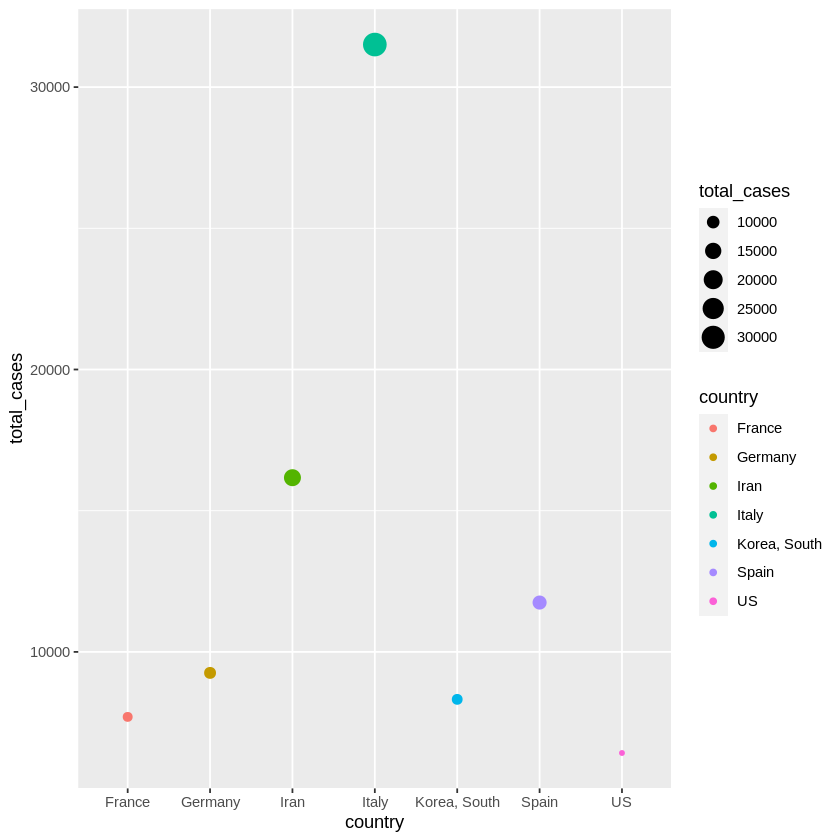

In [ ]:
# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(7, total_cases) %>% arrange(desc(total_cases)) %>% ggplot(aes(country,total_cases,color=country,size=total_cases))+geom_point()

# See the result
top_countries_by_total_cases

From the text, we can infer that the Italy is the worst hit country after China.